In [ ]:
import pandas as pd
from src.rq3._questions import QUALITATIVE

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

QUALITATIVE = [c for c in QUALITATIVE if c[0] not in ["Q44", "Q17"]]
IN = "../../../data/rq3/results/survey_with_codes.csv"
GROUPS = "../../../data/rq3/results/groups.csv"

groups = pd.read_csv(GROUPS, index_col=None)
df = pd.read_csv(IN, header=[0,1,2])
df = df.droplevel(2,1).droplevel(1,1)
groups["Group"] = groups["Group"].astype("Int64")
groups = groups.set_index(["Question", "Group"])

In [2]:
df = finished = df[df["Finished"]]
counts = finished.groupby("Dev/Maintain choice").size()
counts

Dev/Maintain choice
Code contributor              135
Maintainer/Project Manager    143
dtype: int64

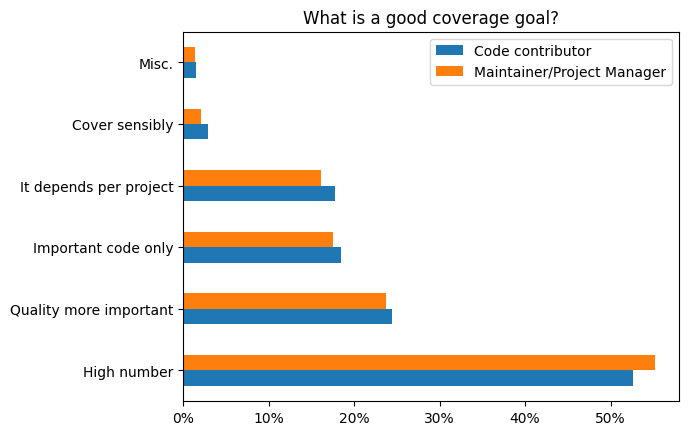

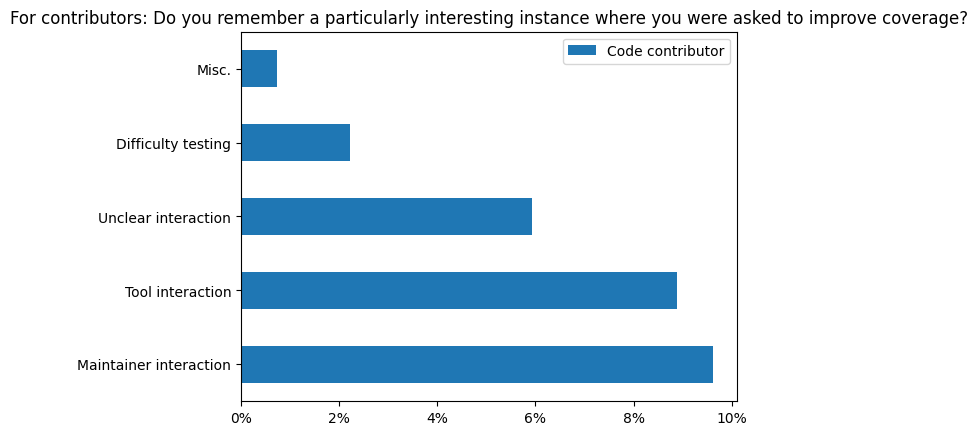

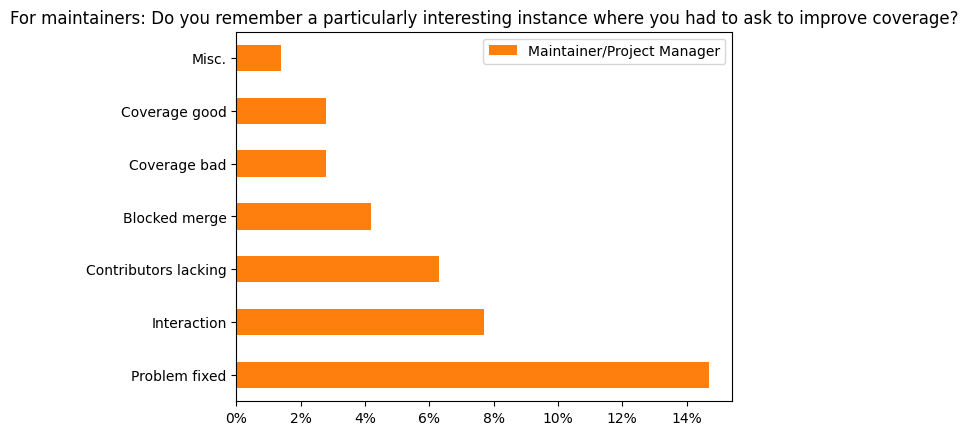

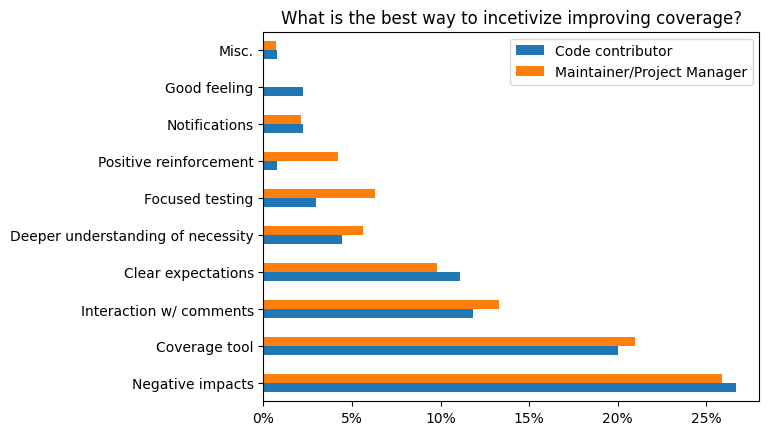

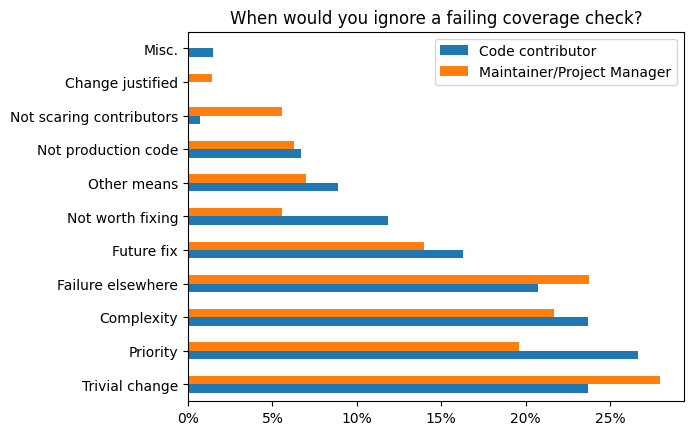

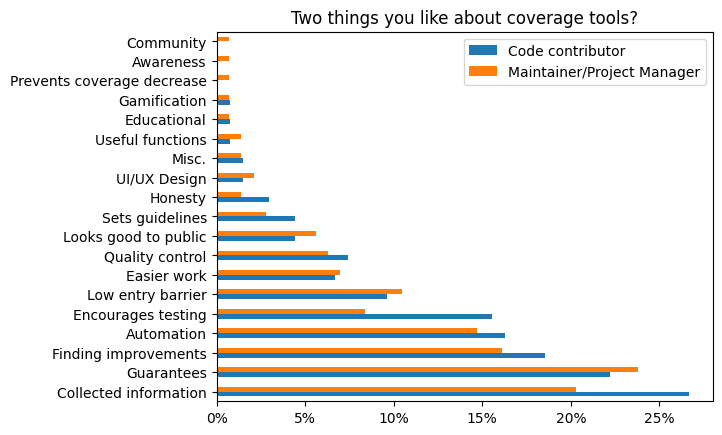

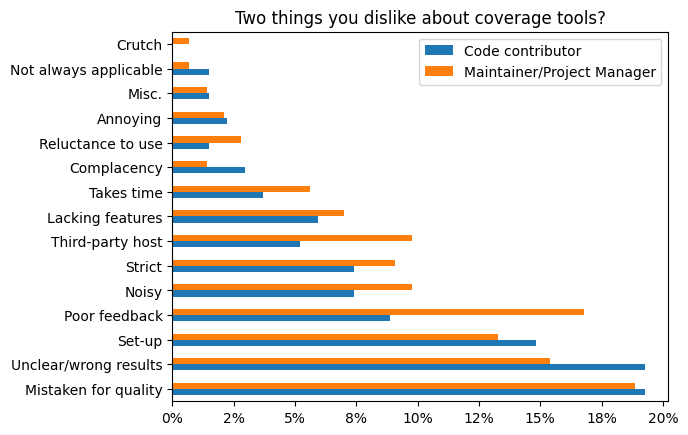

In [3]:
from matplotlib.ticker import PercentFormatter

COLORS = {"Q27": "tab:blue", "Q29": "tab:orange"}
for q in QUALITATIVE:
    c = f"{q[0]} - Groups"
    q_df: pd.DataFrame = df[["Dev/Maintain choice", c]].copy()
    x = df[c].dropna()
    q_df[c] = x.str.split(" \+ ")
    q_df = q_df.explode(c)
    # We count how many participants said X, not how often, so we exclude duplicates
    q_df = q_df.reset_index().drop_duplicates().set_index("index")
    x = q_df.groupby("Dev/Maintain choice")[c].value_counts().unstack().transpose()

    x["Sum"] = x.sum(axis=1)
    x: pd.DataFrame = x.sort_values("Sum", ascending=False).drop("Sum", axis=1)

    labels = groups.loc[q[0], "Name"]
    # print(labels)
    ticks = pd.to_numeric(x.index, "coerce").astype("Int64").map(lambda i: labels[i])
    # print(ticks)

    color = COLORS[q[0]] if q[0] in COLORS else None
    # ax = x.plot(kind="barh", color=color)
    # ax.legend()
    # ax.set_yticklabels(ticks)

    y = x.copy()
    for column in y.columns:
        y[column] = y[column] / counts[column] * 100

    ax = y.plot(kind="barh", color=color, title=q[1])
    ax.legend()
    ax.set_ylabel("")
    ax.set_yticklabels(ticks)
    ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


In [16]:
import re

for q in QUALITATIVE:
    c = f"{q[0]} - Groups"
    q_df: pd.DataFrame = df[["Dev/Maintain choice", c]].copy()
    x = df[c].dropna()
    q_df[c] = x.str.split(" \+ ")
    q_df = q_df.explode(c)
    # We count how many participants said X, not how often, so we exclude duplicates
    q_df = q_df.reset_index().drop_duplicates().set_index("index")
    x = q_df.groupby("Dev/Maintain choice")[c].value_counts().unstack().transpose()
    # print(x)
    z = [(df["Dev/Maintain choice"] == "Code contributor").sum(), (df["Dev/Maintain choice"] == "Maintainer/Project Manager").sum()]
    # print(z)
    # x = x/x.sum(0)
    # x = x.applymap("{:.0%}".format)

    gr = groups.loc[q[0]]
    codes = pd.DataFrame()
    codes["Category"] = gr["Name"]
    codes["Summary"] = gr["Summary"]
    codes["Example"] = ""

    codes.index = codes.index.astype(str)

    if "Code contributor" in x:
        absolute = x["Code contributor"].dropna().astype(int)
        percentage = absolute / z[0]
        percentage = percentage.apply("{:.0%}".format)
        combined = absolute.astype(str) + " (" + percentage + ")"
        codes["Contributor mentioned"] = combined
        # codes["Contributor mentioned"] = x["Code contributor"]/z[0]
        # codes["Contributor mentioned"] = codes["Contributor mentioned"].apply("{:.0%}".format)
    if "Maintainer/Project Manager" in x:
        absolute = x["Maintainer/Project Manager"].dropna().astype(int)
        percentage = absolute / z[1]
        percentage = percentage.apply("{:.0%}".format)
        combined = absolute.astype(str) + " (" + percentage + ")"
        codes["Maintainer mentioned"] = combined
        # codes["Maintainer mentioned"] = x["Maintainer/Project Manager"]/z[1]
        # codes["Maintainer mentioned"] = codes["Maintainer mentioned"].apply("{:.0%}".format)

    # x = x.applymap("{:.0%}".format)

    def huh(x):
        print(x)
        y = ["textbf:--rwrap;" for _ in x]
        return y

    codes = codes.reset_index(drop=True)
    print(codes)
    latex = codes.style.hide().format(escape="latex").set_table_styles([
        {"selector": "midrule", "props": ":midrule;"},
        {"selector": "footnotesize", "props": ":;"}
    ]).format_index("\\textbf{{{}}}", axis=1).to_latex(position_float="centering", column_format="L" * len(
        codes.columns)).replace("\\begin{tabular}", "\\begin{tabulary}{\linewidth}").replace("lllll", "LLLLL")
    # print(latex)
    latex = latex.replace("\end{tabular}", "\end{tabulary}" + f"\\caption{{{q[1]}}}\\label{{tab:rq3:{q[0]}}}")
    f = open(f"../../../data/rq3/tabs/{q[0]}.tex", "w")
    f.write(latex)
    f.close()


                 Category  \
0             High number   
1     Important code only   
2  It depends per project   
3          Cover sensibly   
4  Quality more important   
5                   Misc.   

                                                                                                 Summary  \
0                                                                          Goal is to have high coverage   
1                            Goal is to cover important parts of the code. Trivial code can be uncovered   
2                                  Coverage goal depends on multiple factors. Lot of different variables   
3  Goal is to have everything covered in a sensible matter, where uncovered items are justified properly   
4       Not a lot of focus on coverage, since it distracts from actually writing high quality code/tests   
5                                                                                                    NaN   

  Example Contributor mentioned Maintai

In [ ]:
c = "Q43 - Groups"
q_df: pd.DataFrame = df[["Dev/Maintain choice", c, "Q43"]].copy()
x = df[c].dropna()
# print(x)
q_df[c] = x.str.split(" \+ ")
q_df = q_df.explode(c)
# print(q_df)
print(q_df[q_df[c] == "6"])
# We count how many participants said X, not how often, so we exclude duplicates
q_df = q_df.reset_index().drop_duplicates().set_index("index")
x = q_df.groupby("Dev/Maintain choice")[c].value_counts().unstack().transpose()
print(x)
z = [(df["Dev/Maintain choice"] == "Code contributor").sum(), (df["Dev/Maintain choice"] == "Maintainer/Project Manager").sum()]

codes = pd.DataFrame()
gr = groups.loc["Q43"]
codes["Category"] = gr["Name"]
codes["Summary"] = gr["Summary"]
codes["Example"] = ""

codes.index = codes.index.astype(str)
# print(x.index)

if "Code contributor" in x:
    codes["Contributor mentioned"] = x["Code contributor"]/z[0]
    codes["Contributor mentioned"] = codes["Contributor mentioned"].apply("{:.0%}".format)
if "Maintainer/Project Manager" in x:
    codes["Maintainer mentioned"] = x["Maintainer/Project Manager"]/z[1]
    codes["Maintainer mentioned"] = codes["Maintainer mentioned"].apply("{:.0%}".format)

codes
